# Data Processing

In [2]:
import pandas as pd

In [2]:
data_cab = pd.read_csv("./uber-lyft-cab-prices/cab_rides.csv",delimiter=',')
data_weather = pd.read_csv("./uber-lyft-cab-prices/weather.csv",delimiter=',')

In [3]:
data_cab.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
data_cab = data_cab.drop(columns=['id','product_id'])

In [5]:
data_weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [6]:
from datetime import datetime
data_cab['date_time'] = [datetime.utcfromtimestamp(i/1000).strftime('%Y-%m-%d:%H') for i in data_cab['time_stamp']]
data_cab['date'] = [datetime.utcfromtimestamp(i/1000).strftime('%Y-%m-%d') for i in data_cab['time_stamp']]
data_cab['time'] = [datetime.utcfromtimestamp(i/1000).strftime('%H:%M') for i in data_cab['time_stamp']]
data_cab['weekday'] = [(pd.Timestamp(i)).dayofweek for i in data_cab['date']]
data_cab = data_cab.drop(columns=['time_stamp'])
data_weather['date_time'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d:%H') for i in data_weather['time_stamp']]
data_weather = data_weather.drop(columns=['time_stamp'])

In [9]:
data_cab['date-location'] = data_cab.source.astype(str)+","+data_cab.date_time.astype(str)
data_weather['date-location'] = data_weather.location.astype(str)+","+data_weather.date_time.astype(str)

In [10]:
data_cab.head()

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,date,time,weekday,date-location
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16:09,2018-12-16,09:30,6,"Haymarket Square,2018-12-16:09"
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27:02,2018-11-27,02:00,1,"Haymarket Square,2018-11-27:02"
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,2018-11-28:01,2018-11-28,01:00,2,"Haymarket Square,2018-11-28:01"
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30:04,2018-11-30,04:53,4,"Haymarket Square,2018-11-30:04"
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,"Haymarket Square,2018-11-29:03"


In [11]:
data_weather.head()

,temp,location,clouds,pressure,rain,humidity,wind,date_time,date-location
0,42.42,Back Bay,1.0,1012.14,0.1228,0.77,11.25,2018-12-16:23,"Back Bay,2018-12-16:23"
1,42.43,Beacon Hill,1.0,1012.15,0.1846,0.76,11.32,2018-12-16:23,"Beacon Hill,2018-12-16:23"
2,42.50,Boston University,1.0,1012.15,0.1089,0.76,11.07,2018-12-16:23,"Boston University,2018-12-16:23"
3,42.11,Fenway,1.0,1012.13,0.0969,0.77,11.09,2018-12-16:23,"Fenway,2018-12-16:23"
4,43.13,Financial District,1.0,1012.14,0.1786,0.75,11.49,2018-12-16:23,"Financial District,2018-12-16:23"


In [12]:
data_weather.index = data_weather['date-location']
data_merged = data_cab.join(data_weather,on=['date-location'],rsuffix ='_copy')

In [13]:
import numpy as np
data_merged = data_merged[pd.notnull(data_merged['temp'])]
data_merged['rain'] = data_merged['rain'].replace(np.nan,0)

In [14]:
data_merged = data_merged.drop(columns=['date_time_copy','date-location_copy'])

In [15]:
data_merged = data_merged.drop(columns=['date-location','location'])

In [16]:
data_merged[:10]

,distance,cab_type,destination,source,price,surge_multiplier,name,date_time,date,time,weekday,temp,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,2018-12-16:09,2018-12-16,09:30,6,38.46,0.29,1022.25,0.0000,0.76,7.68
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27:02,2018-11-27,02:00,1,44.31,1.00,1003.17,0.1123,0.90,13.69
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,2018-11-27:02,2018-11-27,02:00,1,43.82,0.99,1002.59,0.0997,0.89,11.57
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,2018-11-30:04,2018-11-30,04:53,4,35.08,0.00,1013.71,0.0000,0.70,5.25
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,37.58,0.42,998.64,0.0000,0.71,11.30
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,37.80,0.47,998.20,0.0000,0.70,11.02
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,2018-11-29:03,2018-11-29,03:49,3,37.66,0.41,998.42,0.0000,0.71,11.16
5,0.44,Lyft,North Station,Haymarket Square,16.5,1.0,Lux Black,2018-12-17:18,2018-12-17,18:25,0,40.78,0.93,1000.15,0.0000,0.79,7.55
6,1.08,Lyft,Northeastern University,Back Bay,10.5,1.0,Lyft XL,2018-11-26:05,2018-11-26,05:03,0,40.65,0.93,1013.76,0.0000,0.92,3.01
6,1.08,Lyft,Northeastern University,Back Bay,10.5,1.0,Lyft XL,2018-11-26:05,2018-11-26,05:03,0,40.39,0.92,1013.79,0.0000,0.93,2.71


In [17]:
data_merged.to_csv("./data_merged.csv",index=False,sep=',')

# Map Visulization

In [2]:
import plotly.offline as py
import plotly.graph_objects as go
py.init_notebook_mode(connected=True)
from plotly.graph_objs import Scatter, Layout,Figure
import matplotlib.pyplot as plt

In [3]:
data_train = pd.read_csv("./Data/data_merged.csv",delimiter=',')

In [5]:
dest_lat = ["42.342907","42.352141","42.350666","42.365008","42.364007", "42.340422","42.355976",
            "42.363428","42.358865","42.351884","42.350282","42.366265"]
dest_lon = ["-71.100292","-71.055135","-71.105410","-71.054222","-71.058433", "-71.089269","-71.0549726",
            "-71.066568","-71.0707475","-71.064262","-71.080968","-71.063098"]

In [6]:
mapbox_access_token = "pk.eyJ1IjoiamFjaW5kYTk2IiwiYSI6ImNrNnhnaHhtaDBpMHIza284cjY2djFtZzIifQ.6JXJfAP7R3Lz7vBZpNhc9w"

fig = go.Figure(go.Scattermapbox(
        lat=dest_lat,
        lon=dest_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=["Fenway","South Station","Boston University",
            "North End","Haymarket Square","Northeastern University",
             "Financial District","West End","Beacon Hill",
             "Theatre District","Back Bay","North Station"],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=42.35,
            lon=-71.07
        ),
        pitch=0,
        zoom=12
    ),
)

fig.show()

In [7]:
import psutil
fig.write_image("./chart/boston_map.png")

# Data Distribution

Text(0.5,1,'Cab type distribution')

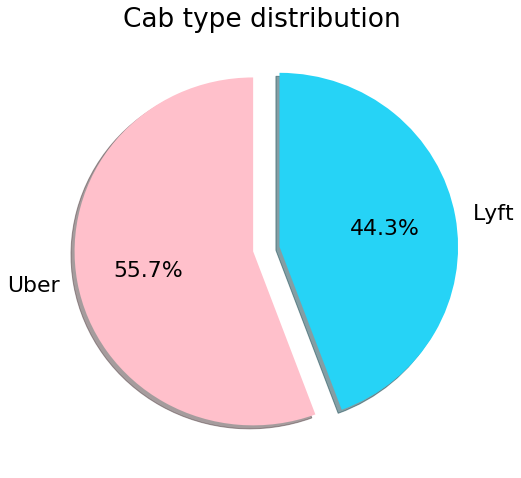

In [9]:
import pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
type_distribution = data_train["cab_type"].value_counts()
plt.pie(type_distribution,radius=None,labels=["Uber", "Lyft"],colors=["#ffc0cb","#26d3f6"],explode = (0.05,0.1),
        labeldistance = 1.1,autopct = '%0.1f%%',shadow = True,startangle = 90,pctdistance = 0.6)
plt.rcParams.update({'font.size': 22})
plt.title('Cab type distribution')

Text(0.5,1,'Cab name distribution')

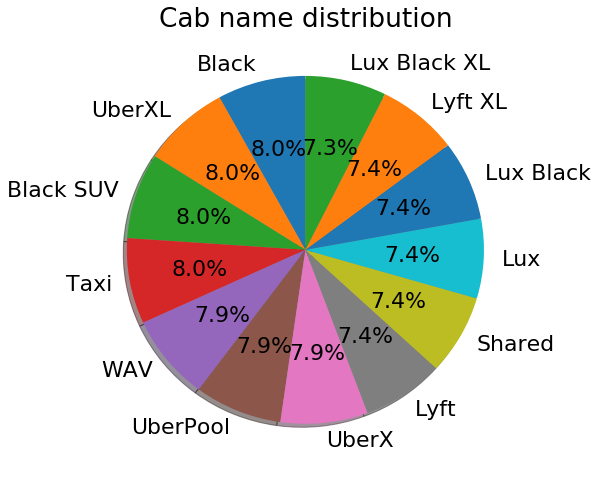

In [8]:
# pylab.rcParams['figure.figsize'] = (15.0, 8.0)
# name_distribution = data_train["name"].value_counts()
# sns.barplot(name_distribution.index, name_distribution.values/1000,color="g")
# plt.ylabel('Nums of routes in thousands')
# plt.xlabel("Cab_name")
# plt.title('Cab name distribution')
pylab.rcParams['figure.figsize'] = (8.0, 8.0)
type_distribution = data_train["name"].value_counts()
plt.pie(type_distribution,radius=None,labels=type_distribution.index,
        labeldistance = 1.1,autopct = '%1.1f%%',shadow = True,startangle = 90,pctdistance = 0.6)
plt.rcParams.update({'font.size': 22})
plt.title('Cab name distribution')

Text(0.5,1,'Distance distribution')

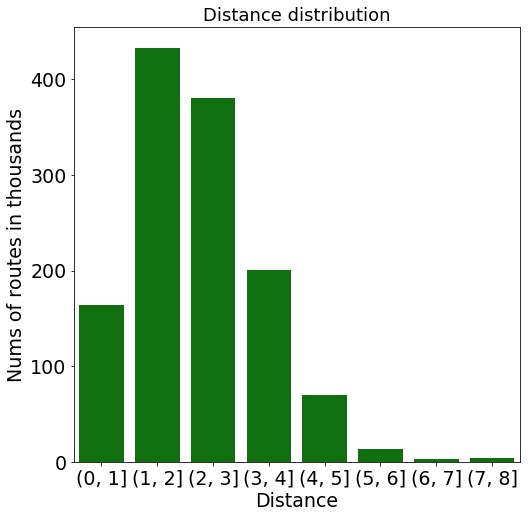

In [22]:
distance_distribution = data_train["distance"]
dist_range=list(range(0,9,1))
distance_distribution=pd.cut(distance_distribution,dist_range,right=True)
distance_distribution = distance_distribution.value_counts()
sns.barplot(distance_distribution.index, distance_distribution.values/1000,color="g")
plt.rcParams.update({'font.size': 15})
plt.ylabel('Nums of routes in thousands')
plt.xlabel("Distance")
plt.title('Distance distribution')

Text(0.5,1,'Weekday distribution')

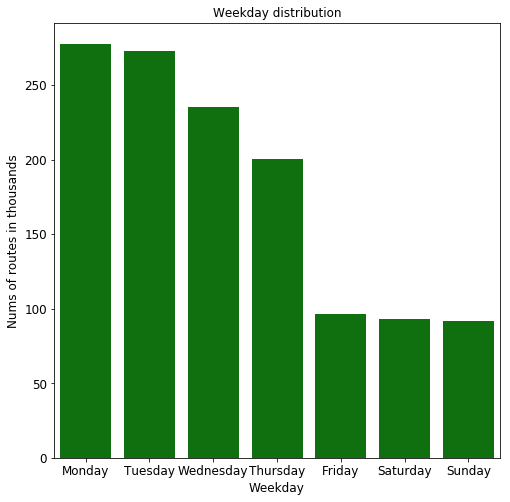

In [25]:
weekday_distribution = data_train["weekday"].value_counts()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.barplot(order, weekday_distribution.values/1000,color="g")
plt.rcParams.update({'font.size': 10})
plt.ylabel('Nums of routes in thousands')
plt.xlabel("Weekday")
plt.title('Weekday distribution')

Text(0.5,1,'Price distribution')

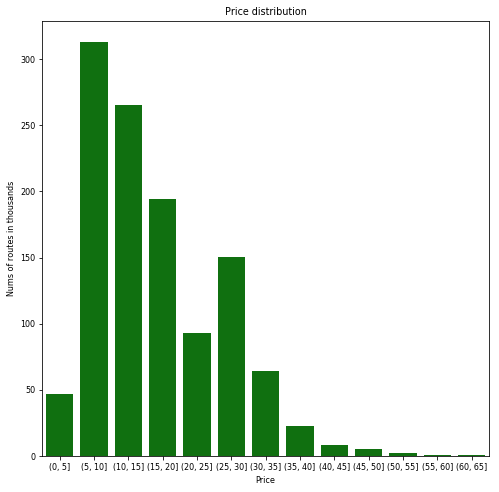

In [28]:
price_distribution = data_train["price"]
price_range=list(range(0,70,5))
price_distribution=pd.cut(price_distribution,price_range,right=True)
price_distribution = price_distribution.value_counts()
sns.barplot(price_distribution.index, price_distribution.values/1000,color="g")
plt.ylabel('Nums of routes in thousands')
plt.xlabel("Price")
plt.title('Price distribution')

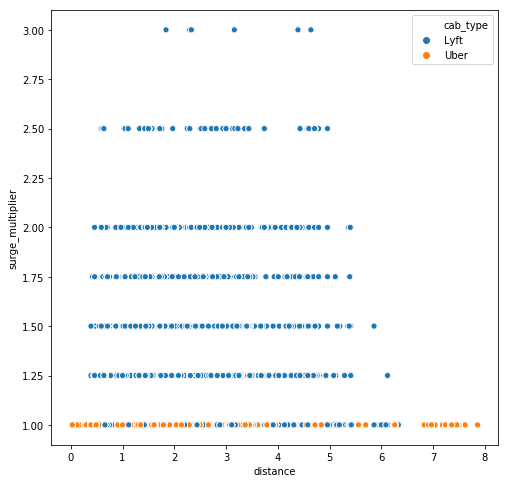

In [11]:
sns.scatterplot(x=data_train["distance"],y=data_train["surge_multiplier"],data=data_train,hue=data_train["cab_type"])

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

data = pd.read_csv('./Data/data_merged.csv', delimiter=',')
data = data.dropna(axis=0, how='any', thresh=None, inplace=False)
uber_data = data.loc[data['cab_type'] == 'Uber']
lyft_data = data.loc[data['cab_type'] == 'Lyft']
uber_prices = uber_data

# Weather Graphs

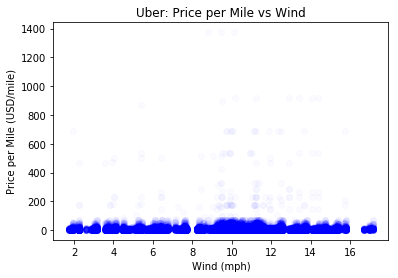

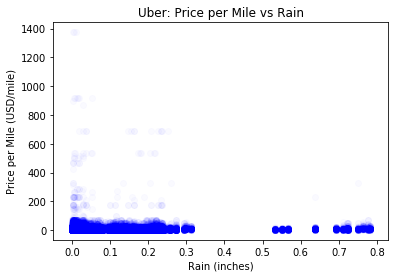

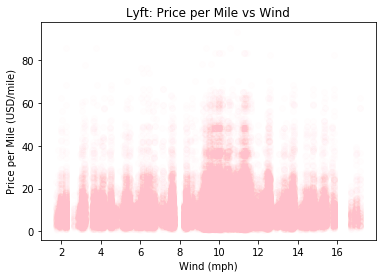

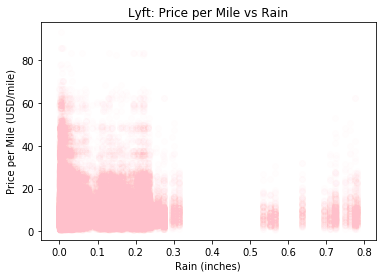

In [4]:
def scatter_ppm_vs_weather(df, weather, title, xaxis, color):
    '''
    Creates a "heatmap" scatterplot of price per mile vs weather condition
    df : pd.DataFrame to pull data from
    weather: the weather condition we are going to plot against
    title: string title of the graph
    xaxis: the title of the xaxis
    color: the color of the scatter markers
    '''
    
    assert isinstance(df, pd.DataFrame)
    assert isinstance(weather, str)
    assert isinstance(title, str)
    assert isinstance(xaxis, str)
    assert isinstance(color, str)

    
    plt.figure()
    plt.scatter(df[weather], (df['price'] / df['distance']), alpha=0.02, facecolor=color),
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel('Price per Mile (USD/mile)')
    plt.show()
                
scatter_ppm_vs_weather(uber_data, 'wind', 'Uber: Price per Mile vs Wind', 'Wind (mph)', 'blue')
scatter_ppm_vs_weather(uber_data, 'rain', 'Uber: Price per Mile vs Rain', 'Rain (inches)', 'blue')
scatter_ppm_vs_weather(lyft_data, 'wind', 'Lyft: Price per Mile vs Wind', 'Wind (mph)', 'pink')
scatter_ppm_vs_weather(lyft_data, 'rain', 'Lyft: Price per Mile vs Rain', 'Rain (inches)', 'pink')

# Vars for Subsequent Graphs

In [32]:
from datetime import time

uber_weekday = uber_data['weekday']
uber_prices = uber_data['price']
lyft_times = lyft_data['time']
lyft_weekday = lyft_data['weekday']
lyft_prices = lyft_data['price']

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot : Avg Price per Mile vs Day of Week (time of day intervals)

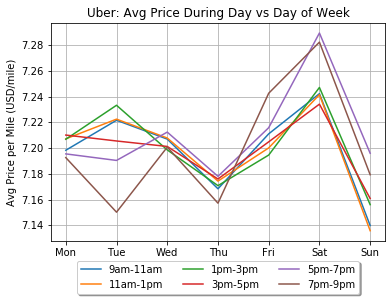

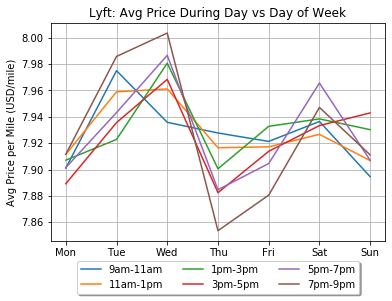

In [33]:
def thresholdTime(df, target, threshold):
    '''
    Returns a subset of the original dataframe: df containing only entries
    whose value in the "time" column is the same as the target column
    df: pd.DataFrame to pull data from
    target: the target hour [0,24]
    threshold: the amount of hours ahead of the target that will be accepted for the ret data
    return: a pd.DataFrame consisting of rows that fit in the threshold from the target hour
    '''
    assert isinstance(df, pd.DataFrame)
    assert isinstance(target, int) and 0 <= target <= 24
    assert isinstance(threshold, int)
    
    times = df['time']
    valid = []
    for time in times:
        tsplit = time.split(':')
        thour = int(tsplit[0])
        if target - thour < threshold:
            valid.append(time)
    ret = df[df['time'].isin(valid)]
    
    return ret          


def weekday_avgs(df):
    '''
    Returns a dataframe whose index is the integer representation of the
    days of the week and the column values the average price for that day
    df: pd.DataFrame to pull data from
    return: pd.DataFrame of the mean price per mile ordered with an index of its corresonpding weekday
    '''
    assert isinstance(df, pd.DataFrame)
    
    wda = df.groupby('weekday')['price'].mean() / df.groupby('weekday')['distance'].mean()
    
    return wda


def price_avg_vs_weekday(df, weekdays, title, start, end, interval):
    '''
    Generates a Average price vs weekday graph
    df: the dataframe to pull price data from
    weekdays : the x-axis labels
    interval: the time interval to generate the list of time plots 
    start: the starting hour for the time intervals
    end: the ending time for the time intervals
    return: reference to the figure
    '''
    
    assert isinstance(df, pd.DataFrame)
    assert isinstance(weekdays, list)
    assert isinstance(title, str)
    assert isinstance(interval, int) and interval > 0
    assert isinstance(start, int) and start >= 0 and start <=24
    assert isinstance(end, int) and end >= 0 and end <= 24
    
    fig = plt.figure()

    for i in range(start, end, interval):
        stime = '{}{}'.format(str(i if i < 12 else i - 12), ('am' if i < 12 else 'pm'))
        iend = i + interval
        etime = '{}{}'.format(str(iend if iend < 12 else iend - 12), ('am' if iend < 12 else 'pm'))
        trange = '{}-{}'.format(stime, etime)
        plt.plot(weekdays, weekday_avgs(thresholdTime(df, i, interval)), label=trange)
        
    plt.xlabel('Weekday')
    plt.ylabel('Avg Price per Mile (USD/mile)')
    plt.title(title)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), fancybox=True, shadow=True, ncol=3)
    plt.grid()
    
    return fig

    
# Uber: Avg Price During Day vs Day of Week (7am-9pm, 2hr intervals)
f = price_avg_vs_weekday(uber_data, weekdays, 'Uber: Avg Price During Day vs Day of Week', 9, 21, 2)
# Lyft: Avg Price During Day vs Day of Week (7am-9pm, 2hr intervals)
f = price_avg_vs_weekday(lyft_data, weekdays, 'Lyft: Avg Price During Day vs Day of Week', 9, 21, 2)

# Boxplots Avg Price per Mile vs Cab-Type

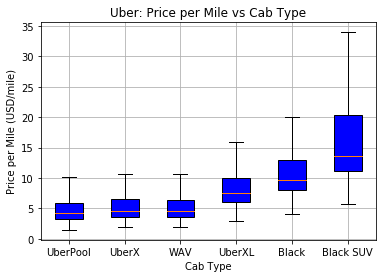

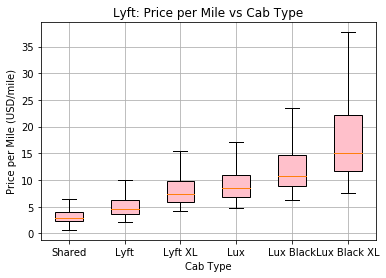

In [16]:
def cab_type_vs_ppm(df, cabtypes, title, color, fliers=False):
    '''
    Produces graph containing a boxplot(s) of the price 
    per mile vs every cab_type for the particular df.
    The ordering of cab types follows the ordering of the cabtypes list.
    df: the dataframe to pull data from
    cabtypes: a list of string names of the cabtypes to be plotted from df in the order given
    title: a string title of the graph
    color: the color of the filling for each boxplot
    fliers: True = show outliers, False = no outliers
    return: reference to the figure plotted
    '''
    
    assert isinstance(df, pd.DataFrame)
    assert isinstance(cabtypes, list)
    assert isinstance(title, str)
    assert isinstance(color, str)
    assert isinstance(fliers, bool)
    
    ctypes = df['name'].unique().tolist()
    
    f = plt.figure()
    
    ppm_data = []
    for ctype in cabtypes:
        ppm_data.append((df[df['name'] == ctype].price / df[df['name'] == ctype].distance).tolist()) 
        
    plt.boxplot(ppm_data, labels=cabtypes, showfliers=fliers, patch_artist=True, boxprops={'facecolor': color})
    plt.title(title)
    plt.xlabel('Cab Type')
    plt.ylabel('Price per Mile (USD/mile)')
    plt.grid()
    plt.show()
    
    return f
    
        
# Uber: Price per Mile vs Cab Type
uber_types = ['UberPool', 'UberX', 'WAV', 'UberXL', 'Black', 'Black SUV']
f = cab_type_vs_ppm(uber_data, uber_types, 'Uber: Price per Mile vs Cab Type', color='blue')
# Lyft: Price per Mile vs Cab Type
lyft_types = ['Shared', 'Lyft', 'Lyft XL', 'Lux', 'Lux Black', 'Lux Black XL',]
f = cab_type_vs_ppm(lyft_data, lyft_types, 'Lyft: Price per Mile vs Cab Type', color='pink')

# Gephi Graph Generation

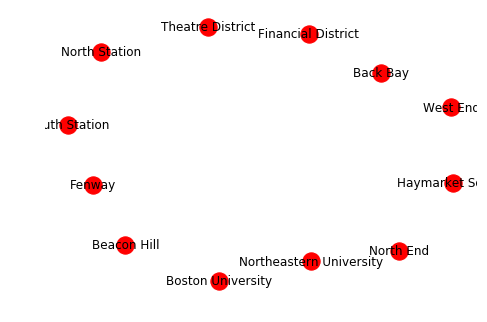

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import math
import matplotlib.pyplot as plt

dataset = pd.read_csv('./uber-lyft-cab-prices/cab_rides.csv', delimiter = ',')                                   #Read the dataset as Dataframe
dataset = dataset.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)     #delete invalid rows
'''
    create the node set for sources.
'''
grapher = nx.DiGraph();       
sources = dataset['source'];                                                              #Filter out nodes from source attribute
sources = sources.drop_duplicates(keep='first',inplace=False)                             #We want each node appear once
grapher.add_nodes_from(sources.values);
nx.draw(grapher,with_labels = True) 
plt.show()

In [3]:
'''
    Split the dataset
'''
uber = dataset[dataset['cab_type']=='Uber']
lyft = dataset[dataset['cab_type']=='Lyft']

print(uber)
print(lyft)

        distance cab_type     time_stamp destination     source  price  \
12          1.11     Uber  1543615981179    West End  North End   12.0   
13          1.11     Uber  1544698211014    West End  North End   16.0   
14          1.11     Uber  1544728503935    West End  North End    7.5   
15          1.11     Uber  1545004511430    West End  North End    7.5   
16          1.11     Uber  1544748007961    West End  North End   26.0   
...          ...      ...            ...         ...        ...    ...   
693065      1.00     Uber  1543708385534   North End   West End    9.5   
693066      1.00     Uber  1543708385534   North End   West End   13.0   
693067      1.00     Uber  1543708385534   North End   West End    9.5   
693069      1.00     Uber  1543708385534   North End   West End   27.0   
693070      1.00     Uber  1543708385534   North End   West End   10.0   

        surge_multiplier                                    id  \
12                   1.0  009e9c53-074d-43cf-


Haymarket Square
25614
Back Bay
25655
North Station
25326
Fenway
25620
Theatre District
25530
Beacon Hill
25464
Financial District
26237
North End
25620
Northeastern University
25614
Boston University
25620
West End
25488
South Station
25620


/Users/apple/Library/Python/3.6/lib/python/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/apple/Library/Python/3.6/lib/python/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


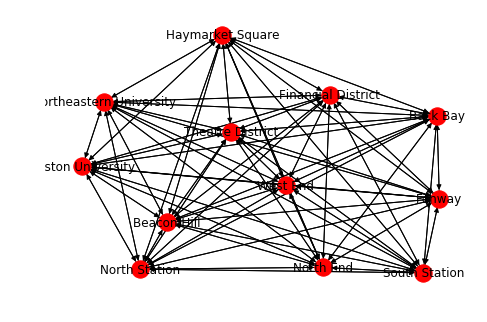

In [4]:
'''
    Handle each dataset separately
    This part is for lyft
    Further visualization would be done in Gephi
'''
lyftgraph = nx.DiGraph();
sources = lyft['source'];
sources = sources.drop_duplicates(keep='first',inplace=False)
lyftgraph.add_nodes_from(sources.values);
print(lyftgraph)
label = 0
nx.set_node_attributes(lyftgraph,label,'meanprice');

for i in lyftgraph.nodes:
    print(i);
    a = lyft[lyft['source'] == i];
    prices = a['price'].values
    distances = a['distance'].values;
    print(prices.shape[0]);
    numitem = int(prices.shape[0])
    for j in range(1,numitem):
        prices[j] = prices[j]/distances[j];                      #We want to get the price/distance ratio
    lyftgraph.nodes[i]['meanprice'] = np.mean(prices);
    
    
sources = lyft['source'];
sources = sources.drop_duplicates(keep='first',inplace=False)
sources = sources.values
destinations = lyft['destination'];
destinations = destinations.drop_duplicates(keep='first',inplace=False)
destinations = destinations.values

for i in sources:
    for j in destinations:    
        a = lyft[(lyft['source']==i)&(lyft['destination']==j)];
        b = a['price'].values;
        lyftgraph.add_edge(i,j,weight = np.mean(b));
nx.draw(lyftgraph,with_labels = True) 
plt.show()
john2 = nx.write_gml(lyftgraph,'lyft_price_dist.gml');


North End
27551
[12.         14.41441441  6.75675676 ... 20.37037037  7.82122905
  4.74860335]
10.334979945614013
Beacon Hill
27377
[ 8.5         6.0483871   8.26612903 ...  5.92592593 20.37037037
  8.88888889]
7.8017763996278315
North Station
27250
[29.5         3.23129252  5.10204082 ...  3.27868852  8.52459016
  5.40983607]
9.809227981210688
Boston University
27552
[ 9.5         2.80235988  5.01474926 ... 10.52631579  3.25077399
  3.09597523]
7.585875626203107
South Station
27540
[25.          4.81927711  4.81927711 ...  6.4         8.8
  6.2       ]
10.714119319446157
Fenway
27546
[27.          3.90879479  6.02605863 ...  8.46905537  5.86319218
  3.58306189]
6.470698381944742
Theatre District
27671
[ 8.          8.28025478  5.0955414  ...  9.31677019  9.31677019
 16.77018634]
10.936231948077621
West End
27492
[13.5      7.34375  4.375   ...  9.5     27.      10.     ]
9.572976610069619
Back Bay
27546
[14.          8.8362069   4.09482759 ...  6.72554348  2.17391304
  3.46467391]
9.

/Users/apple/Library/Python/3.6/lib/python/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/apple/Library/Python/3.6/lib/python/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


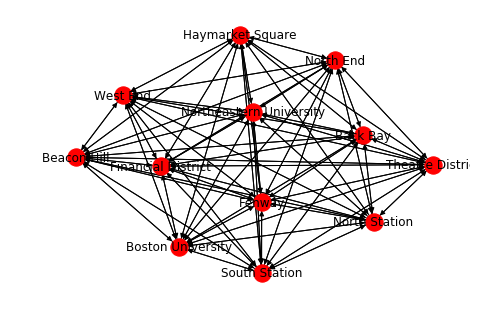

In [5]:
'''
    Handle each dataset separately
    This part is for uber
'''
ubergraph = nx.DiGraph();
sources = uber['source'];
sources = sources.drop_duplicates(keep='first',inplace=False)
ubergraph.add_nodes_from(sources.values);
print(ubergraph)
label = 0
nx.set_node_attributes(ubergraph,label,'meanprice');

for i in ubergraph.nodes:
    print(i);
    a = uber[uber['source'] == i];
    prices = a['price'].values
    distances = a['distance'].values;
    print(prices.shape[0]);
    numitem = int(prices.shape[0])
    for j in range(1,numitem):
        prices[j] = prices[j]/distances[j];
    print(prices)
    ubergraph.nodes[i]['meanprice'] = np.mean(prices);
    print(ubergraph.nodes[i]['meanprice']);
    
    
sources = uber['source'];
sources = sources.drop_duplicates(keep='first',inplace=False)
sources = sources.values
destinations = uber['destination'];
destinations = destinations.drop_duplicates(keep='first',inplace=False)
destinations = destinations.values

for i in sources:
    for j in destinations:    
        a = uber[(uber['source']==i)&(uber['destination']==j)];
        b = a['price'].values;
        ubergraph.add_edge(i,j,weight = np.mean(b));
nx.draw(ubergraph,with_labels = True) 
plt.show()
john2 = nx.write_gml(ubergraph,'uber_price_dist.gml');

# Price Prediction

In [37]:
import numpy as np
data_train = pd.read_csv("./Data/data_merged.csv",delimiter=',')
data_train['rain'] = data_train.apply(lambda x: int(x['rain']>0.1), axis = 1)
data_train = data_train[data_train['name'] != "Taxi"]
# Random Shuffle
data_train = data_train.sample(frac=1).reset_index(drop=True)

In [38]:
X_des = data_train['destination'].tolist()
X_source = data_train['source'].tolist()
X_name = data_train['name'].tolist()
X_time = data_train['time'].tolist()
X_weekday = data_train['weekday'].tolist()
X_rain = data_train['rain'].tolist()

In [39]:
cab_type_map = {"Lyft":0, "Uber":1}
loc_type = {"North Station":0, "South Station":1, "North End":2, "Northeastern University":3, "Boston University":4,
           "Back Bay":5, "Beacon Hill":6, "Fenway":7,"Financial District":8, "Haymarket Square":9,"West End":10,
            "Theatre District":11}
name_type = {"Shared":0, "Lux":1, "Lux Black XL":2, "Lyft XL":3, "Lux Black":4, "Lyft":5, "UberPool":6,"UberX":7,
             "UberXL":8,"Black":9,"Black SUV":10, "WAV":11}

In [40]:
X_des = [loc_type[i] for i in X_des]
X_source = [loc_type[i] for i in X_source]
X_name = [name_type[i] for i in X_name]
X_time = [int(i.split(':')[0])*24+int(i.split(':')[1]) for i in X_time]

In [41]:
X = np.column_stack((X_des,X_source,X_name,X_time,X_weekday,X_rain))
X = X.tolist()
Y = data_train['price'].tolist()

# Data spliting
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.2,random_state = 43)

In [ ]:
#test data 
data_test = pd.read_csv("./data_test.csv",delimiter=',')

X_des_test = data_test['destination'].tolist()
X_source_test = data_test['source'].tolist()
X_name_test = data_test['name'].tolist()
X_time_test = data_test['time'].tolist()
X_weekday_test = data_test['weekday'].tolist()
X_rain_test = data_test['rain'].tolist()
X_des_test = [loc_type[i] for i in X_des_test]
X_source_test = [loc_type[i] for i in X_source_test]
X_name_test = [name_type[i] for i in X_name_test]
X_time_test = [int(i.split(':')[0])*24+int(i.split(':')[1]) for i in X_time_test]
X_test = np.column_stack((X_des_test,X_source_test,X_name_test,X_time_test,X_weekday_test,X_rain_test))
Y_test = data_test['price'].tolist()

# RandomForest 

In [42]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

/Users/apple/Library/Python/3.6/lib/python/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [44]:
# count accuracy
def accuracy(errors_data, data):
    '''
    :param errors_data:
    :param data:
    :return:
    '''
    mape = 100 * (errors_data / data)
    return 100 - np.mean(mape)

In [45]:
# print out the result
def Result_show(errors_train, errors_valid, errors_test, accuracy_train,accuracy_valid, accuracy_test):
    '''
    :param errors_train:
    :param errors_valid:
    :param errors_test:
    :param accuracy_train:
    :param accuracy_valid:
    :param accuracy_test:
    :return:
    '''

    print('Training Mean Absolute Error:', round(np.mean(errors_train), 2), 'degrees.')
    print('Validation Mean Absolute Error:', round(np.mean(errors_valid), 2), 'degrees.')
    print('Test Mean Absolute Error:', round(np.mean(errors_test), 2), 'degrees.')
    print('Train Accuracy:', round(accuracy_train, 2), '%.')
    print('Valid Accuracy:', round(accuracy_valid, 2), '%.')
    print('Test Accuracy:', round(accuracy_test, 2), '%.')

In [46]:
# Plot estimated and actural price in testset
def chart_show(Y_test_predict,Y_test):

    sns.lineplot(range(200),Y_test_predict,label="Predicted Price")
    sns.lineplot(range(200),Y_test,label="Actual Price")
    plt.legend(loc="upper left")
    plt.ylabel('Price')
    plt.xlabel("index")
    plt.title('Test Set price prediction')
    plt.show()

In [48]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
X_train_sample = X_train[:50000]
Y_train_sample = Y_train[:50000]
X_valid_sample = X_valid[:10000]
Y_valid_sample = Y_valid[:10000]

rf.fit(X_train_sample, Y_train_sample);
Y_predict_train = rf.predict(X_train_sample)
errors_train = abs(Y_predict_train - Y_train_sample)
Y_predict_valid = rf.predict(X_valid_sample)
errors_valid = abs(Y_valid_sample - Y_predict_valid)
Y_test_predict = rf.predict(X_test)
errors_test = abs(Y_test - Y_test_predict)

accuracy_train = accuracy(errors_train, Y_train_sample)
accuracy_valid = accuracy(errors_valid, Y_valid_sample)
accuracy_test = accuracy(errors_test, Y_test)

Result_show(errors_train, errors_valid, errors_test, accuracy_train,accuracy_valid, accuracy_test)

Training Mean Absolute Error: 0.62 degrees.
Validation Mean Absolute Error: 1.61 degrees.
Test Mean Absolute Error: 2.29 degrees.
Train Accuracy: 95.95 %.
Valid Accuracy: 89.4 %.
Test Accuracy: 81.99 %.


Text(0.5,1,'Test Set price prediction')

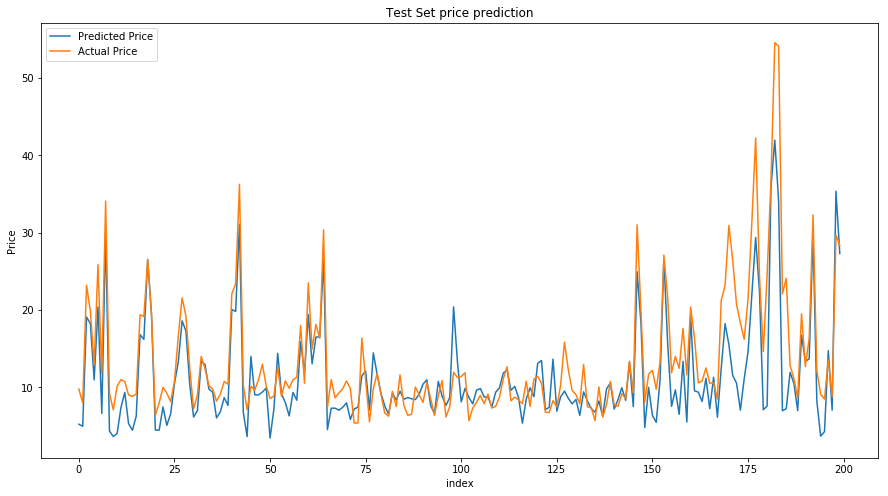

In [49]:
chart_show(Y_test_predict[:200], Y_test[:200])

# SVM

In [30]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
Y = [int(i) for i in Y]
X_train, X_valid, Y_train, Y_valid = train_test_split(X,Y,test_size=0.2,random_state = 43)
clf = SVC(gamma='auto')
X_train_sample = X_train[:50000]
Y_train_sample = Y_train[:50000]
X_valid_sample = X_valid[:10000]
Y_valid_sample = Y_valid[:10000]

clf.fit(X_train_sample, Y_train_sample)
SVC(gamma='auto')

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
Y_predict_train = clf.predict(X_train_sample)
errors_train = abs(Y_predict_train - Y_train_sample)
Y_predict_valid = clf.predict(X_valid_sample)
errors_valid = abs(Y_valid_sample - Y_predict_valid)
Y_test_predict = clf.predict(X_test)
errors_test = abs(Y_test - Y_test_predict)

accuracy_train = accuracy(errors_train, Y_train_sample)
accuracy_valid = accuracy(errors_valid, Y_valid_sample)
accuracy_test = accuracy(errors_test, Y_test)

Result_show(errors_train, errors_valid, errors_test, accuracy_train,accuracy_valid, accuracy_test)

Training Mean Absolute Error: 3.06 degrees.
Valid Mean Absolute Error: 6.64 degrees.
Test Mean Absolute Error: 6.01 degrees.
Train Accuracy: 84.56 %.
Valid Accuracy: 59.77 %.
Test Accuracy: 61.56 %.


Text(0.5,1,'Test Set price prediction')

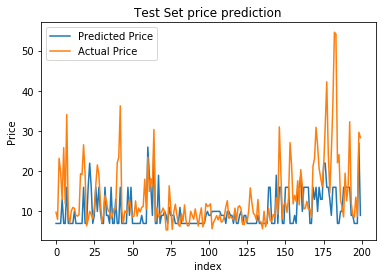

In [32]:
chart_show(Y_test_predict[:200], Y_test[:200])

# Decision tree

In [33]:
from sklearn import tree
clf =tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

In [34]:
Y_predict_train = clf.predict(X_train)
errors_train = abs(Y_predict_train - Y_train)
Y_predict_valid = clf.predict(X_valid)
errors_valid = abs(Y_valid - Y_predict_valid)
Y_test_predict = clf.predict(X_test)
errors_test = abs(Y_test - Y_test_predict)

accuracy_train = accuracy(errors_train, Y_train)
accuracy_valid = accuracy(errors_valid, Y_valid)
accuracy_test = accuracy(errors_test, Y_test)

Result_show(errors_train, errors_valid, errors_test, accuracy_train,accuracy_valid, accuracy_test)

Training Mean Absolute Error: 0.22 degrees.
Valid Mean Absolute Error: 1.04 degrees.
Test Mean Absolute Error: 2.67 degrees.
Train Accuracy: 98.67 %.
Valid Accuracy: 93.01 %.
Test Accuracy: 79.58 %.


Text(0.5,1,'Test Set price prediction')

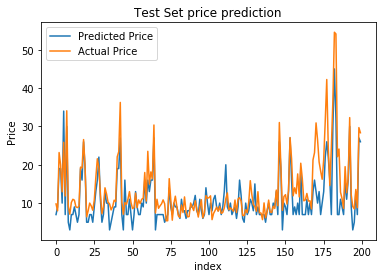

In [35]:
chart_show(Y_test_predict[:200], Y_test[:200])